# Library

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
data = pd.read_csv('./Data/2022 표준지 공시지가.csv')
data.head(3)

,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,...,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
0,1,11110,10100,1,0003,52,서울특별시,종로구,청운동 3-52,공원,...,NaN,공원등,시가지주변 야산지대,급경사지,부정형,세로(불),493500,경기상고,북측 인근,NaN
1,2,11110,10100,1,0004,2,서울특별시,종로구,청운동 4-2,임야,...,NaN,자연림,시가지주변 야산지대,완경사지,부정형,맹지,730500,경가상고,북서측 근거리,남향
2,3,11110,10100,1,0004,15,서울특별시,종로구,청운동 4-15,대,...,NaN,단독주택,기존 주택지대,완경사지,사다리형,세로(가),4250000,경기상고,북서측 인근,북동향


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540050 entries, 0 to 540049
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   일련번호    540050 non-null  int64  
 1   시군구     540050 non-null  int64  
 2   읍면동리    540050 non-null  int64  
 3   지번구분    540050 non-null  int64  
 4   본번지     540050 non-null  object 
 5   부번지     540050 non-null  object 
 6   시도명     540050 non-null  object 
 7   시군구명    537528 non-null  object 
 8   소재지     540050 non-null  object 
 9   지목      540050 non-null  object 
 10  면적      540050 non-null  float64
 11  용도지역1   540050 non-null  object 
 12  용도지역2   5398 non-null    object 
 13  이용상황    540050 non-null  object 
 14  주위환경    540050 non-null  object 
 15  지세명     540050 non-null  object 
 16  형상명     540050 non-null  object 
 17  도로교통    540050 non-null  object 
 18  공시지가    540050 non-null  int64  
 19  지리적위치1  540050 non-null  object 
 20  지리적위치2  515324 non-null  object 
 21  방위      20

# 창원시 데이터 추출

In [4]:
df = data[(data['시도명'] == '경상남도') & (data['시군구명'].str.startswith('창원'))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7903 entries, 465236 to 473138
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일련번호    7903 non-null   int64  
 1   시군구     7903 non-null   int64  
 2   읍면동리    7903 non-null   int64  
 3   지번구분    7903 non-null   int64  
 4   본번지     7903 non-null   object 
 5   부번지     7903 non-null   object 
 6   시도명     7903 non-null   object 
 7   시군구명    7903 non-null   object 
 8   소재지     7903 non-null   object 
 9   지목      7903 non-null   object 
 10  면적      7903 non-null   float64
 11  용도지역1   7903 non-null   object 
 12  용도지역2   47 non-null     object 
 13  이용상황    7903 non-null   object 
 14  주위환경    7903 non-null   object 
 15  지세명     7903 non-null   object 
 16  형상명     7903 non-null   object 
 17  도로교통    7903 non-null   object 
 18  공시지가    7903 non-null   int64  
 19  지리적위치1  7903 non-null   object 
 20  지리적위치2  7689 non-null   object 
 21  방위      3565 non-null   object

# 불필요한 데이터 제거

In [5]:
df.drop(['일련번호','시군구','읍면동리','본번지','부번지','시도명','용도지역2'], axis= 1, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7903 entries, 465236 to 473138
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지번구분    7903 non-null   int64  
 1   시군구명    7903 non-null   object 
 2   소재지     7903 non-null   object 
 3   지목      7903 non-null   object 
 4   면적      7903 non-null   float64
 5   용도지역1   7903 non-null   object 
 6   이용상황    7903 non-null   object 
 7   주위환경    7903 non-null   object 
 8   지세명     7903 non-null   object 
 9   형상명     7903 non-null   object 
 10  도로교통    7903 non-null   object 
 11  공시지가    7903 non-null   int64  
 12  지리적위치1  7903 non-null   object 
 13  지리적위치2  7689 non-null   object 
 14  방위      3565 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 987.9+ KB


# 파생변수

In [6]:
df['땅값'] = df['공시지가'] * df['면적']

# EDA

## Outlier

In [7]:
pd.set_option('display.max_columns', None)
df.head(1)

,지번구분,시군구명,소재지,지목,면적,용도지역1,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위,땅값
465236,1,창원의창구,북동 28,대,182.0,제1종일반주거지역,다세대,기존 주택지대,평지,사다리형,소로한면,844500,창원향교,남서측인근,북향,153699000.0


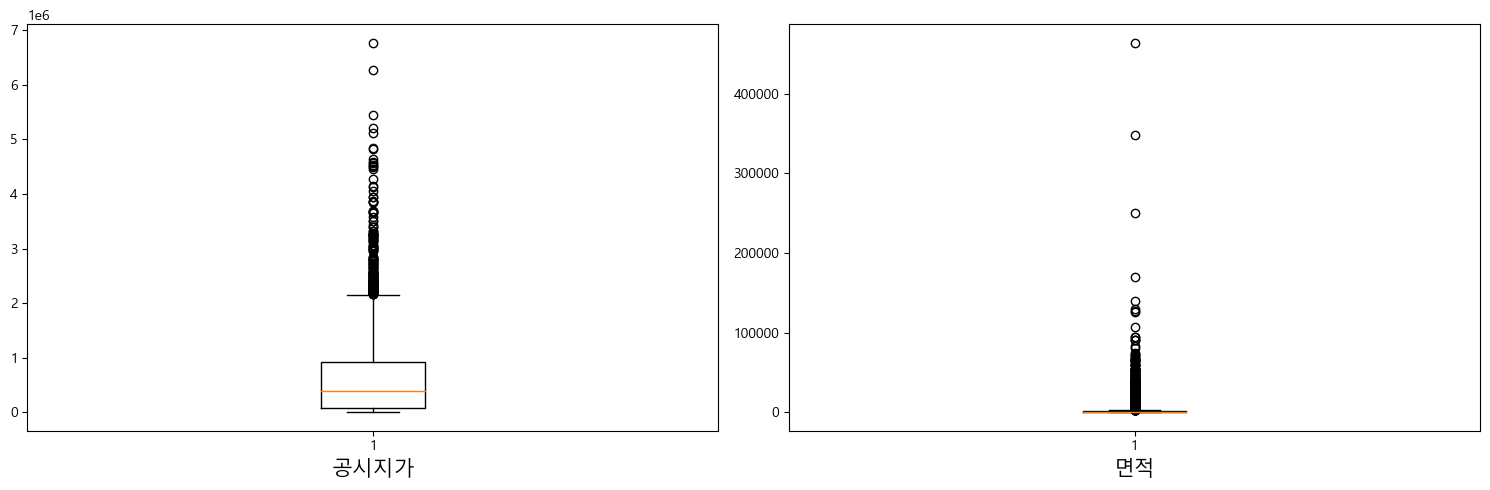

In [8]:
num_index = ['공시지가','면적']

plt.figure(figsize= (15,5))

for i in range(2) :
    plt.subplot(1,2,i+1)
    plt.boxplot(df[num_index[i]].dropna(axis= 0))
    plt.xlabel(num_index[i], fontsize= 15)
    plt.yticks(fontsize= 10)
    plt.tight_layout()
    
plt.show()

## Distribution

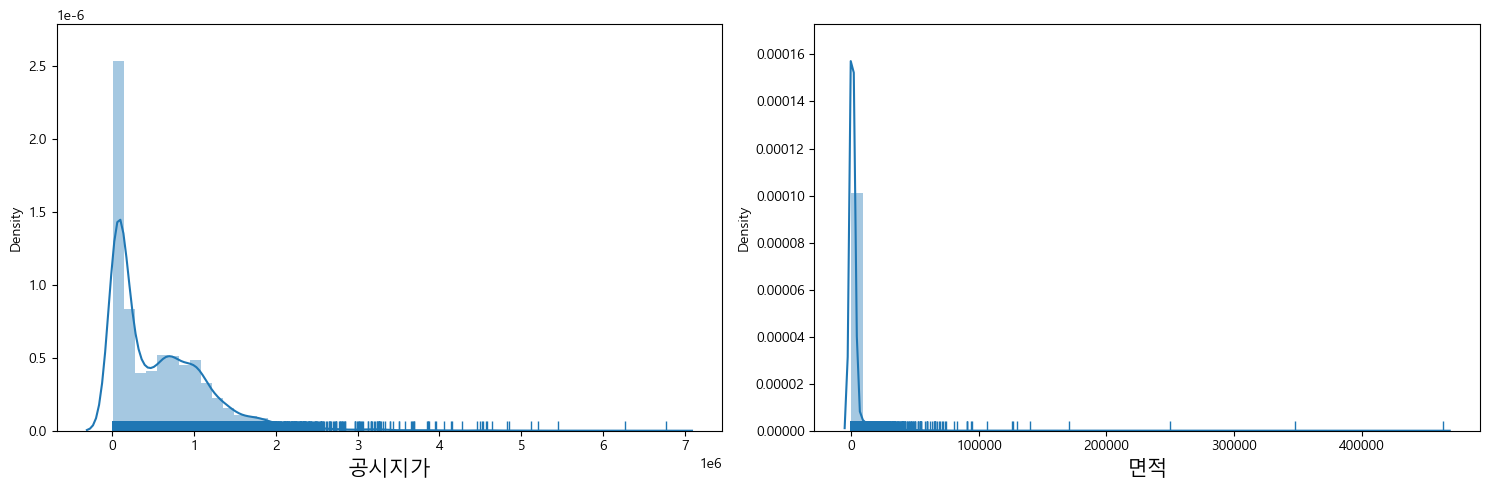

In [9]:
plt.figure(figsize= (15,5))

for i in range(2) :
    plt.subplot(1,2,i+1)
    sns.distplot(df[num_index[i]], hist= True, rug= True)
    plt.xlabel(num_index[i], fontsize= 15)
    plt.xticks(fontsize= 10)
    plt.yticks(fontsize= 10)
    plt.tight_layout()
    
plt.show()   

### Q-Q Plot

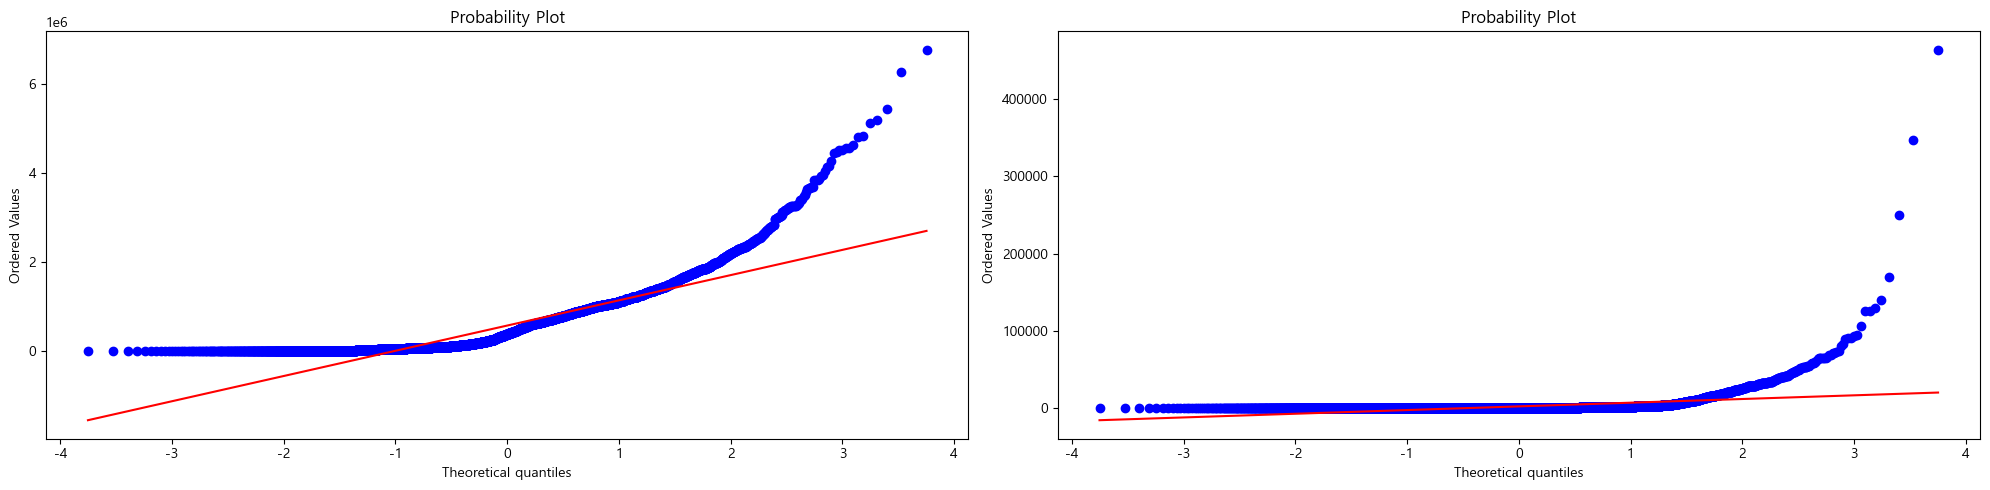

In [10]:
from scipy import stats

plt.figure(figsize= (20,5))

plt.subplot(1,2,1)
stats.probplot(df['공시지가'], plot= plt)

plt.subplot(1,2,2)
stats.probplot(df['면적'], plot= plt)

plt.tight_layout()
plt.show()

* 왜도가 심한 것을 확인
* 정확한 모델링을 위해 Log 변환 필요

## 범주형 변수별 공시지가 평균 차이 비교

### 지번구분별 공시지가 평균 차이 비교

In [11]:
df['지번구분'].value_counts()

1    7237
2     666
Name: 지번구분, dtype: int64

In [12]:
df = df.astype({'지번구분':'category'})
df['지번구분'].value_counts()

1    7237
2     666
Name: 지번구분, dtype: int64

#### Boxplot

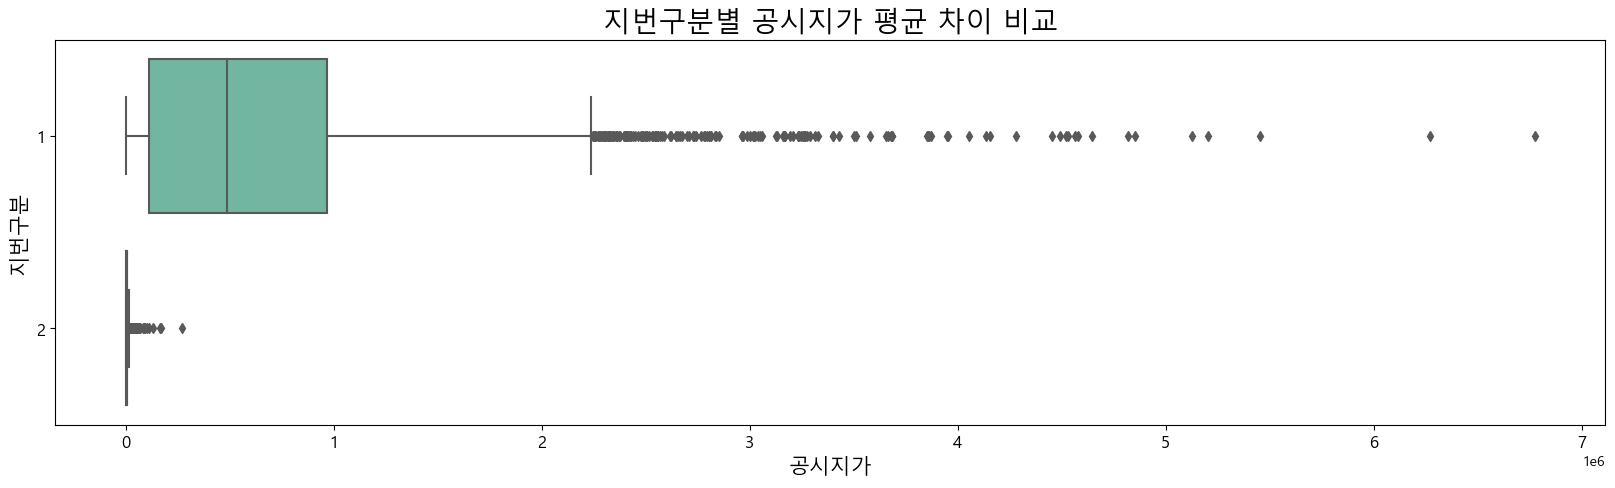

In [13]:
plt.figure(figsize= (20,5))
sns.set_palette('Set2')

plt.title('지번구분별 공시지가 평균 차이 비교', size= 20)
sns.boxplot(x= '공시지가', y= '지번구분', data= df)
plt.xlabel('공시지가', fontsize= 15)
plt.ylabel('지번구분', fontsize= 15)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.show()

### 시군구별 공시지가 평균 차이 비교

In [14]:
df.head(1)

,지번구분,시군구명,소재지,지목,면적,용도지역1,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위,땅값
465236,1,창원의창구,북동 28,대,182.0,제1종일반주거지역,다세대,기존 주택지대,평지,사다리형,소로한면,844500,창원향교,남서측인근,북향,153699000.0


In [15]:
df['시군구명'].value_counts()

창원마산합포구    2830
창원의창구      1856
창원진해구      1330
창원마산회원구    1236
창원성산구       651
Name: 시군구명, dtype: int64

#### Boxplot

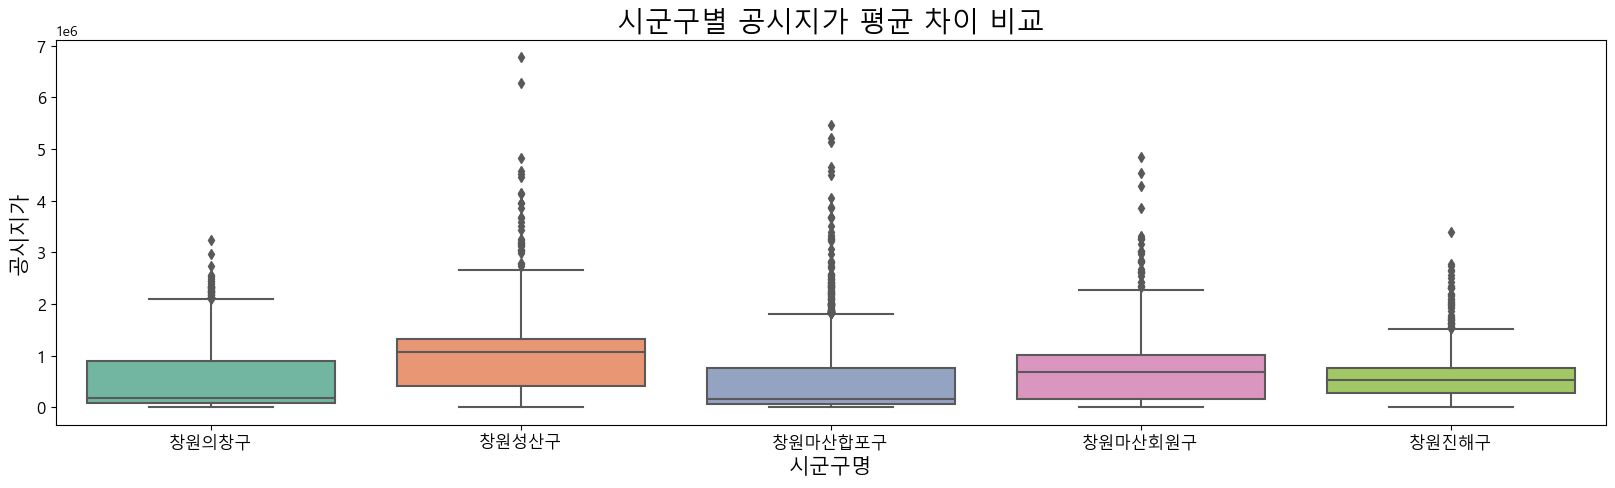

In [16]:
plt.figure(figsize= (20,5))
sns.set_palette('Set2')

plt.title('시군구별 공시지가 평균 차이 비교', size= 20)
sns.boxplot(x= '시군구명', y= '공시지가', data= df)
plt.xlabel('시군구명', fontsize= 15)
plt.ylabel('공시지가', fontsize= 15)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.show()

#### Violine Plot

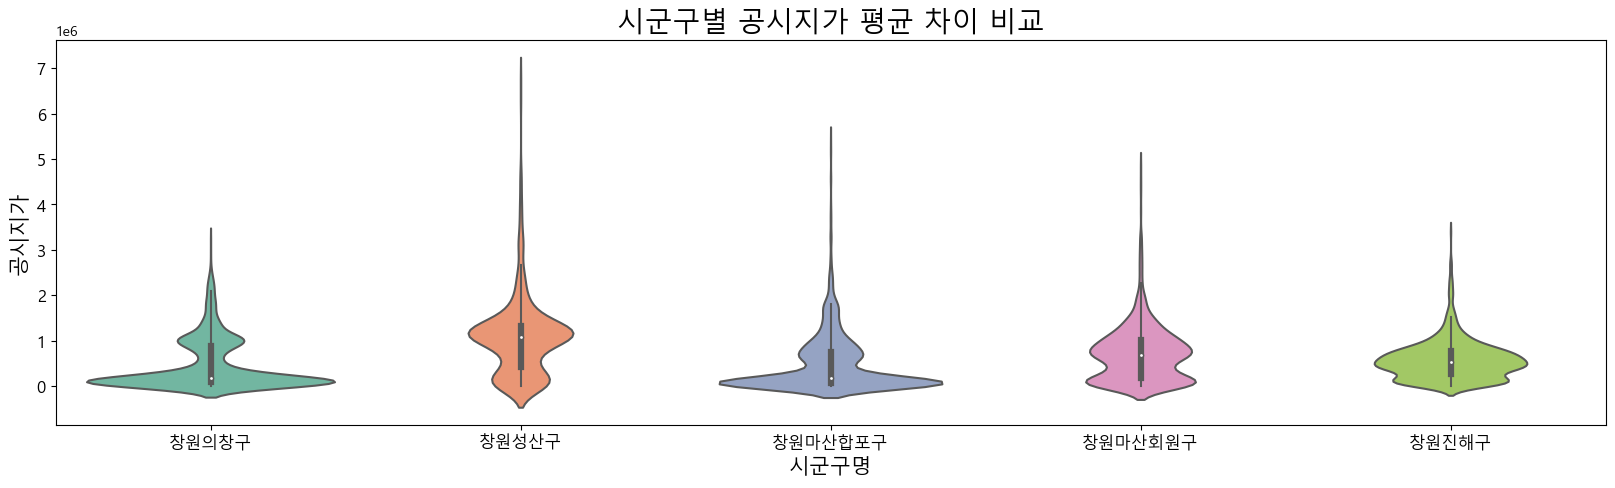

In [17]:
plt.figure(figsize= (20,5))
sns.set_palette('Set2')

plt.title('시군구별 공시지가 평균 차이 비교', size= 20)
sns.violinplot(x= '시군구명', y= '공시지가', data= df)
plt.xlabel('시군구명', fontsize= 15)
plt.ylabel('공시지가', fontsize= 15)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.show()

#### Strip Plot

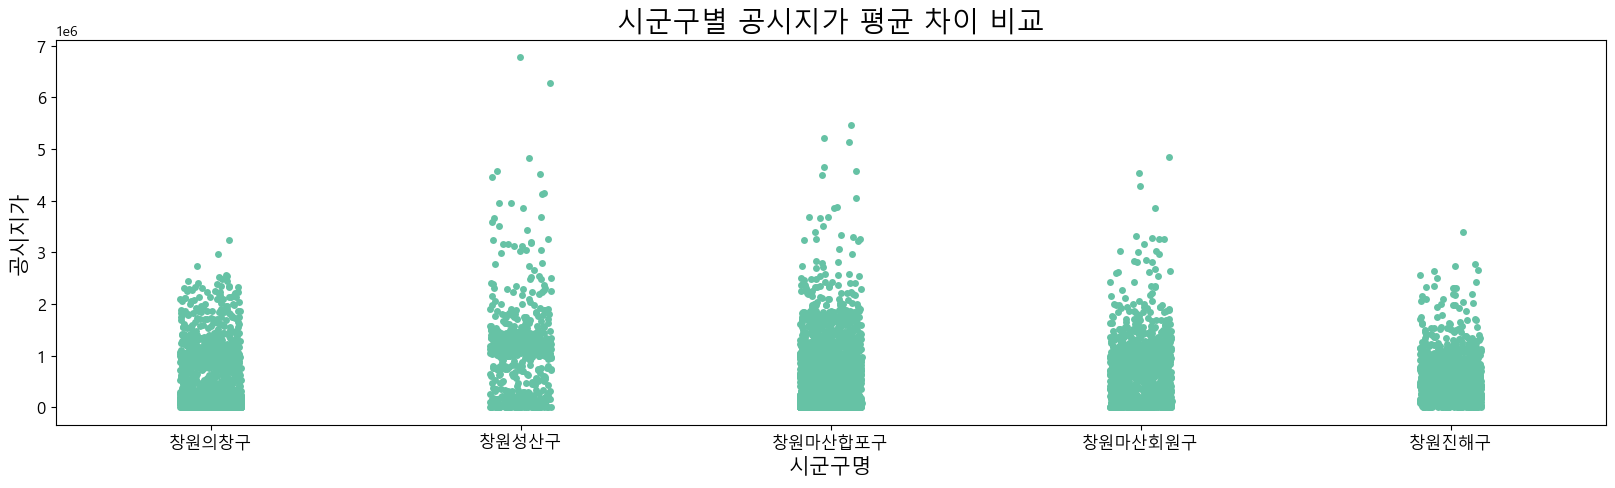

In [18]:
plt.figure(figsize= (20,5))
sns.set_palette('Set2')

plt.title('시군구별 공시지가 평균 차이 비교', size= 20)
sns.stripplot(x= '시군구명', y= '공시지가', data= df)
plt.xlabel('시군구명', fontsize= 15)
plt.ylabel('공시지가', fontsize= 15)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.show()

#### Boxen Plot

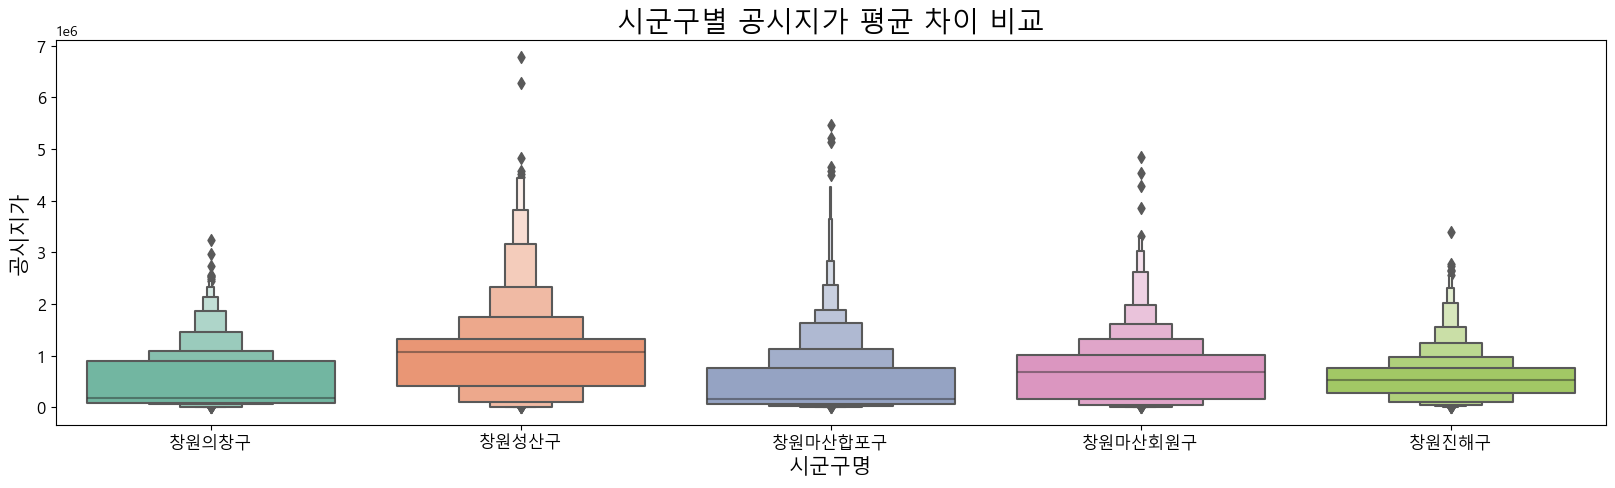

In [19]:
plt.figure(figsize= (20,5))
sns.set_palette('Set2')

plt.title('시군구별 공시지가 평균 차이 비교', size= 20)
sns.boxenplot(x= '시군구명', y= '공시지가', data= df)
plt.xlabel('시군구명', fontsize= 15)
plt.ylabel('공시지가', fontsize= 15)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.show()

### 소재지별 공시지가 평균 차이 비교

In [20]:
df.head(1)

,지번구분,시군구명,소재지,지목,면적,용도지역1,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위,땅값
465236,1,창원의창구,북동 28,대,182.0,제1종일반주거지역,다세대,기존 주택지대,평지,사다리형,소로한면,844500,창원향교,남서측인근,북향,153699000.0


In [21]:
df['소재지'].unique()

array(['북동 28', '북동 35', '북동 72', ..., '가주동 산17', '가주동 산70', '가주동 산120'],
      dtype=object)

In [22]:
import re
df['소재지'] = df['소재지'].map(lambda x : re.sub(r"[^가-힣]", "", x))
df['소재지'].value_counts()

회원동       174
산호동       166
합성동       146
경화동       134
상남동       134
         ... 
반송동산        1
완암동산        1
내동산         1
수도동산        1
동읍다호리산      1
Name: 소재지, Length: 442, dtype: int64

In [23]:
vc1 = df['소재지'].value_counts()
mask1 = vc1[vc1 > 30].index
df1 = df[df['소재지'].isin(mask1)]
df1.shape

(4417, 16)

#### Boxplot

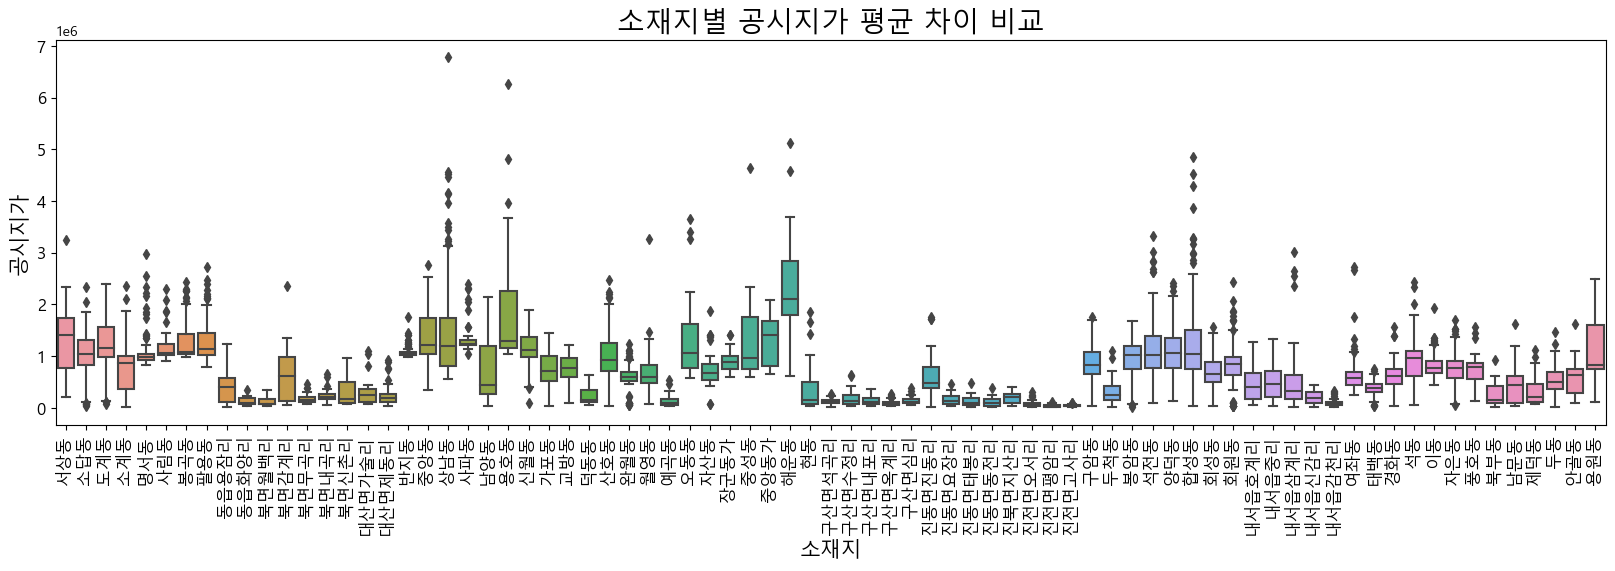

In [24]:
plt.figure(figsize= (20,5))
sns.set_palette('Set2')

plt.title('소재지별 공시지가 평균 차이 비교', size= 20)
sns.boxplot(x= '소재지', y= '공시지가', data= df1)
plt.xlabel('소재지', fontsize= 15)
plt.ylabel('공시지가', fontsize= 15)
plt.xticks(fontsize= 12, rotation= 90)
plt.yticks(fontsize= 12)

plt.show()

### 지목별 공시지가 평균 차이 비교

In [25]:
df.head(1)

,지번구분,시군구명,소재지,지목,면적,용도지역1,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위,땅값
465236,1,창원의창구,북동,대,182.0,제1종일반주거지역,다세대,기존 주택지대,평지,사다리형,소로한면,844500,창원향교,남서측인근,북향,153699000.0


In [26]:
df['지목'].value_counts()

대        4366
답        1548
전         867
임야        708
공장용지      179
과수원       128
잡종지        46
주유소용지      18
창고용지       15
학교용지        8
목장용지        5
유지          4
체육용지        3
묘지          3
종교용지        2
유원지         2
주차장         1
Name: 지목, dtype: int64

In [27]:
vc2 = df['지목'].value_counts()
mask2 = vc2[vc2 < 30].index
df['지목'][df['지목'].isin(mask2)]
df2 = df.replace({i:'기타' for i in vc2[vc2 < 30].index})
df2['지목'].value_counts()

대       4366
답       1548
전        867
임야       708
공장용지     179
과수원      128
기타        61
잡종지       46
Name: 지목, dtype: int64

#### Boxplot

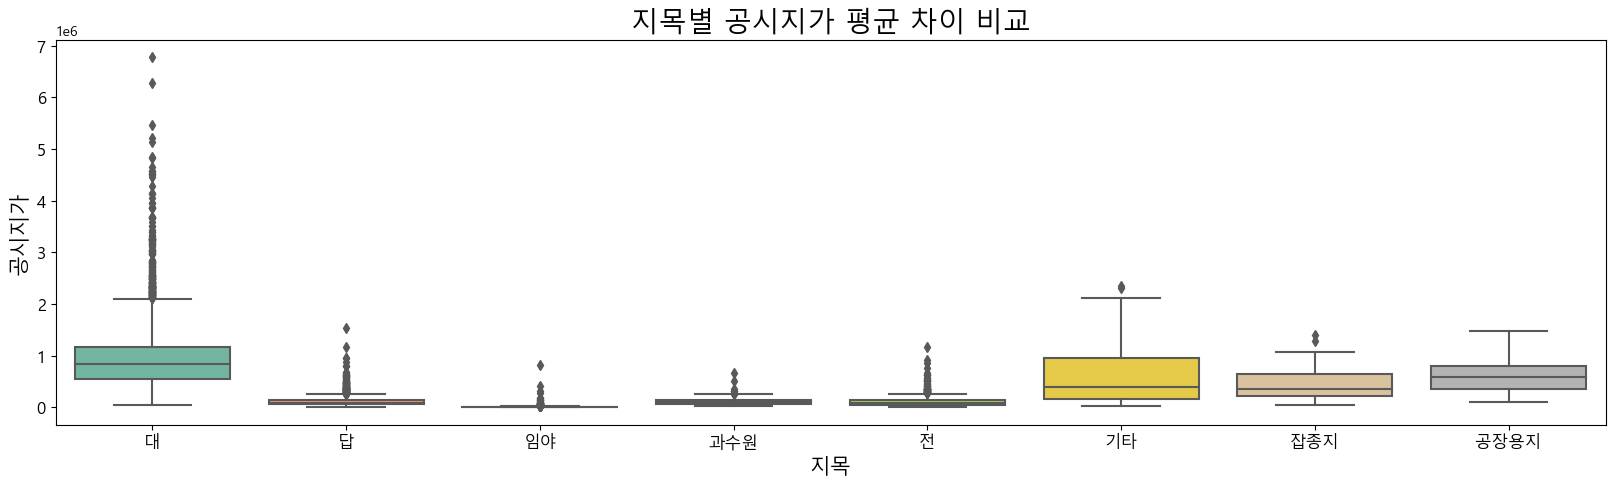

In [28]:
plt.figure(figsize= (20,5))
sns.set_palette('Set2')

plt.title('지목별 공시지가 평균 차이 비교', size= 20)
sns.boxplot(x= '지목', y= '공시지가', data= df2)
plt.xlabel('지목', fontsize= 15)
plt.ylabel('공시지가', fontsize= 15)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.show()

### 용도지역1별 공시지가 평균 차이 비교

In [29]:
df['용도지역1'].value_counts()

제2종일반주거지역    1339
개발제한구역        995
일반상업지역        879
제1종일반주거지역     805
계획관리지역        798
자연녹지지역        704
제1종전용주거지역     511
농림지역          468
제3종일반주거지역     291
준주거지역         211
생산관리지역        204
일반공업지역        180
보전관리지역        140
자연환경보전지역      127
생산녹지지역         59
준공업지역          51
제2종전용주거지역      45
보전녹지지역         33
근린상업지역         23
유통상업지역         21
중심상업지역         18
용도미지정지역         1
Name: 용도지역1, dtype: int64

In [30]:
vc3 = df['용도지역1'].value_counts()
mask3 = vc3[vc3 < 30].index
df['용도지역1'][df['용도지역1'].isin(mask3)]
df3 = df.replace({i:'기타' for i in vc3[vc3 < 30].index})
df3['용도지역1'].value_counts()

제2종일반주거지역    1339
개발제한구역        995
일반상업지역        879
제1종일반주거지역     805
계획관리지역        798
자연녹지지역        704
제1종전용주거지역     511
농림지역          468
제3종일반주거지역     291
준주거지역         211
생산관리지역        204
일반공업지역        180
보전관리지역        140
자연환경보전지역      127
기타             63
생산녹지지역         59
준공업지역          51
제2종전용주거지역      45
보전녹지지역         33
Name: 용도지역1, dtype: int64

#### Boxplot

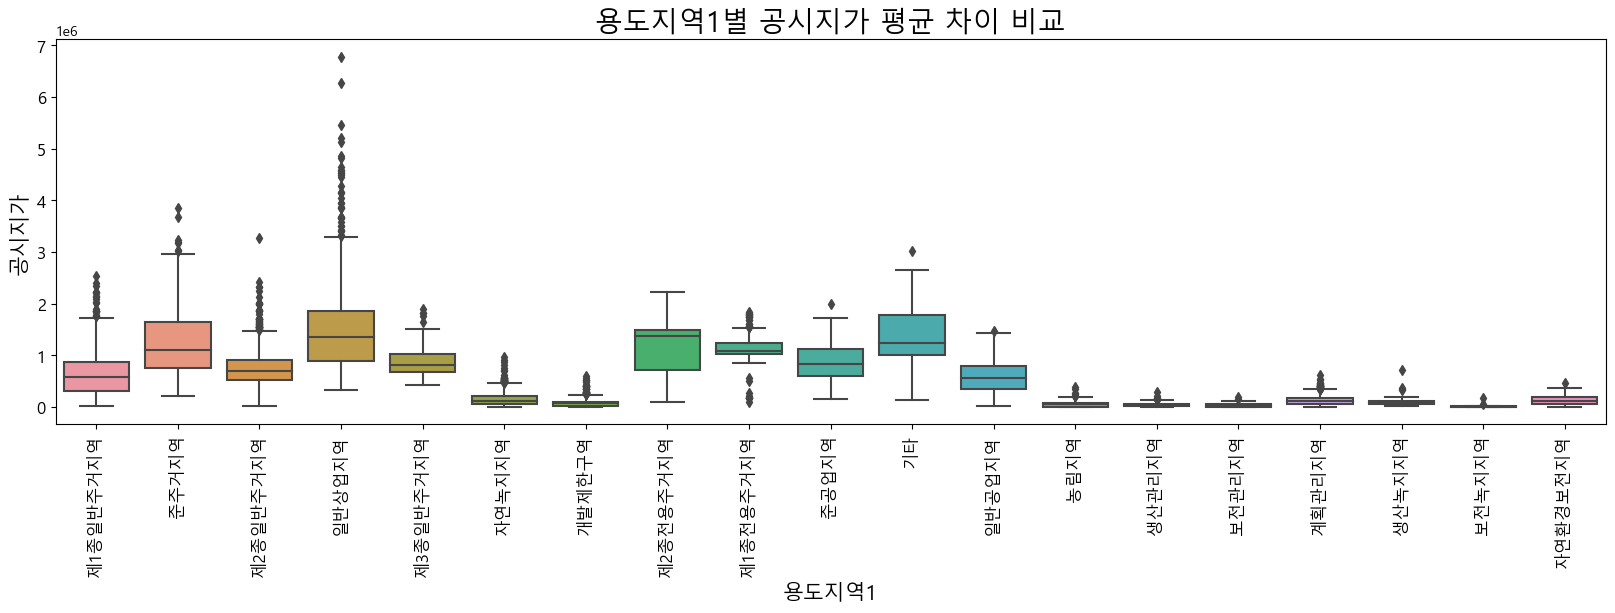

In [31]:
plt.figure(figsize= (20,5))
sns.set_palette('Set2')

plt.title('용도지역1별 공시지가 평균 차이 비교', size= 20)
sns.boxplot(x= '용도지역1', y= '공시지가', data= df3)
plt.xlabel('용도지역1', fontsize= 15)
plt.ylabel('공시지가', fontsize= 15)
plt.xticks(fontsize= 12, rotation= 90)
plt.yticks(fontsize= 12)

plt.show()

### 이용상황별 공시지가 평균 차이 비교

In [32]:
df['이용상황'].value_counts()

단독주택       2522
전          1364
답           763
상업용         758
자연림         670
주상용         647
과수원         327
주거나지        195
공업용         186
아파트          64
주상나지         56
상업나지         56
주거기타         56
상업기타         35
업무용          34
다세대          25
주상기타         24
토지임야         23
공업나지         23
전기타          16
공업기타         11
연립주택          9
답창고           6
답축사           5
답기타           5
터미널           4
전창고           4
유원지           3
유해혐오          2
골프장_회원제       2
공원묘지          2
운동장등          1
기타            1
주차장등          1
공원등           1
조림            1
골프장_대중제       1
Name: 이용상황, dtype: int64

In [33]:
vc4 = df['이용상황'].value_counts()
mask4 = vc4[vc4 < 30].index
df['이용상황'][df['이용상황'].isin(mask4)]
df4 = df.replace({i:'기타' for i in vc4[vc4 < 30].index})
df4['이용상황'].value_counts()

단독주택    2522
전       1364
답        763
상업용      758
자연림      670
주상용      647
과수원      327
주거나지     195
공업용      186
기타       170
아파트       64
상업나지      56
주거기타      56
주상나지      56
상업기타      35
업무용       34
Name: 이용상황, dtype: int64

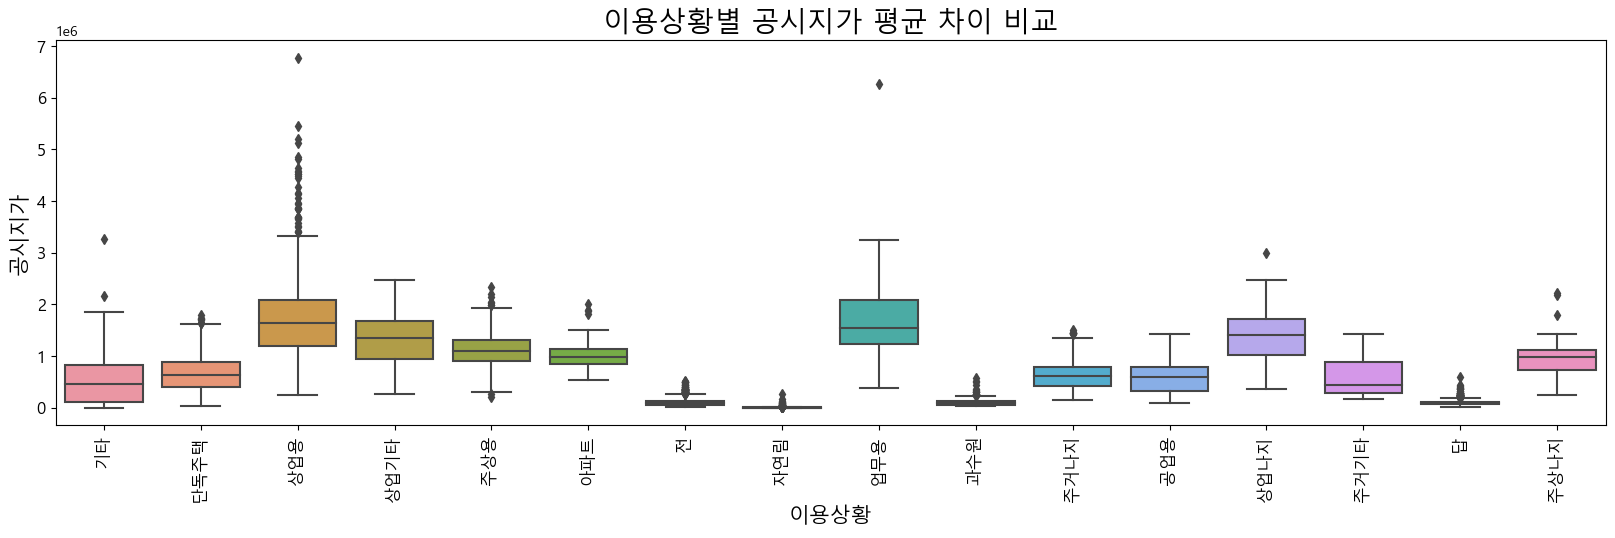

In [34]:
plt.figure(figsize= (20,5))
sns.set_palette('Set2')

plt.title('이용상황별 공시지가 평균 차이 비교', size= 20)
sns.boxplot(x= '이용상황', y= '공시지가', data= df4)
plt.xlabel('이용상황', fontsize= 15)
plt.ylabel('공시지가', fontsize= 15)
plt.xticks(fontsize= 12, rotation= 90)
plt.yticks(fontsize= 12)

plt.show()

### 주위환경별 공시지가 평균 차이 비교

In [35]:
df['주위환경'].value_counts()

기존 주택지대         1067
마을주변 농경지대        756
주택 및 상가혼용지대      570
정비된 주택지대         512
일반 주택지대          454
                ... 
근교 경지정리지대          1
산간 유원지대            1
읍소재지내 경지정리지대       1
해안 경지정리지대          1
연립 주택지대            1
Name: 주위환경, Length: 88, dtype: int64

In [36]:
vc5 = df['주위환경'].value_counts()
mask5 = vc5[vc5 > 30].index
df5 = df[df['주위환경'].isin(mask5)]
df5.shape

(7361, 16)

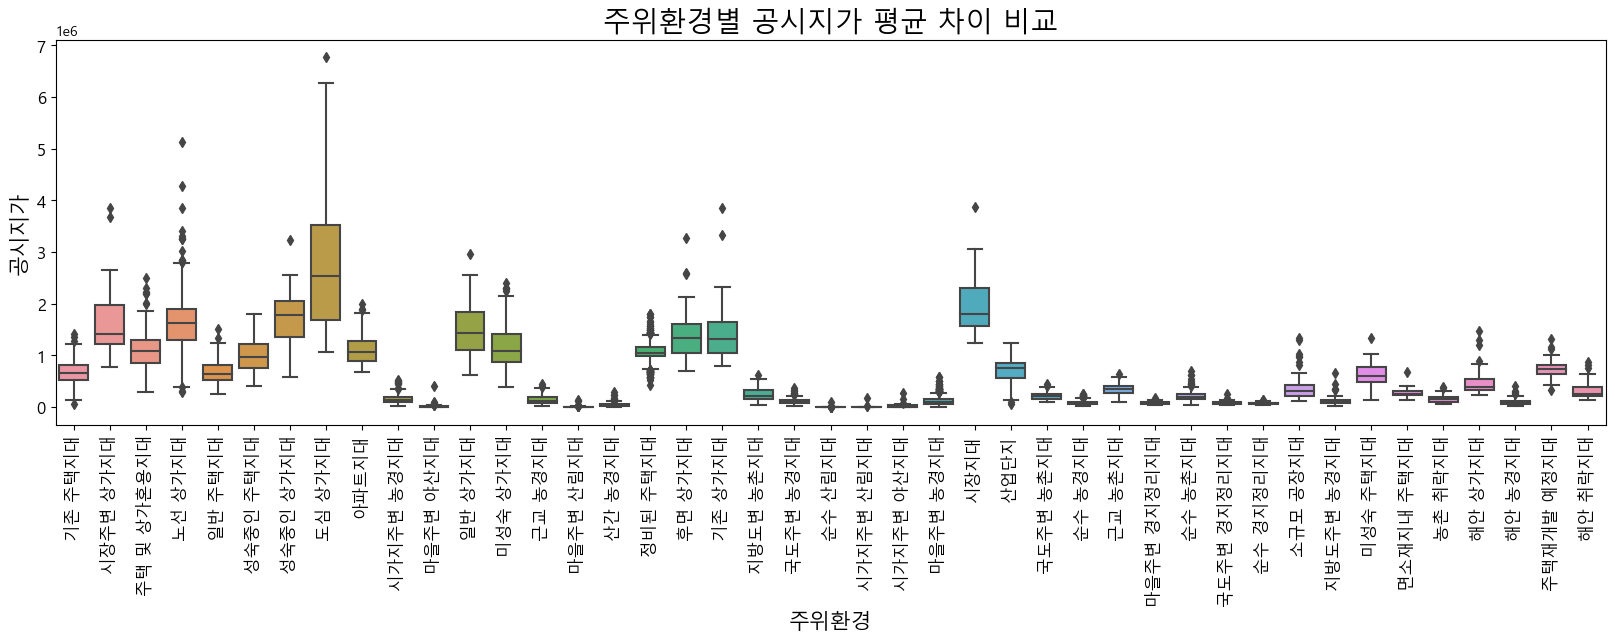

In [37]:
plt.figure(figsize= (20,5))
sns.set_palette('Set2')

plt.title('주위환경별 공시지가 평균 차이 비교', size= 20)
sns.boxplot(x= '주위환경', y= '공시지가', data= df5)
plt.xlabel('주위환경', fontsize= 15)
plt.ylabel('공시지가', fontsize= 15)
plt.xticks(fontsize= 12, rotation= 90)
plt.yticks(fontsize= 12)

plt.show()

### 지세별 공시지가 평균 차이 비교 

In [38]:
df['지세명'].value_counts()

평지      4880
완경사지    2468
급경사지     519
저지        20
고지        16
Name: 지세명, dtype: int64

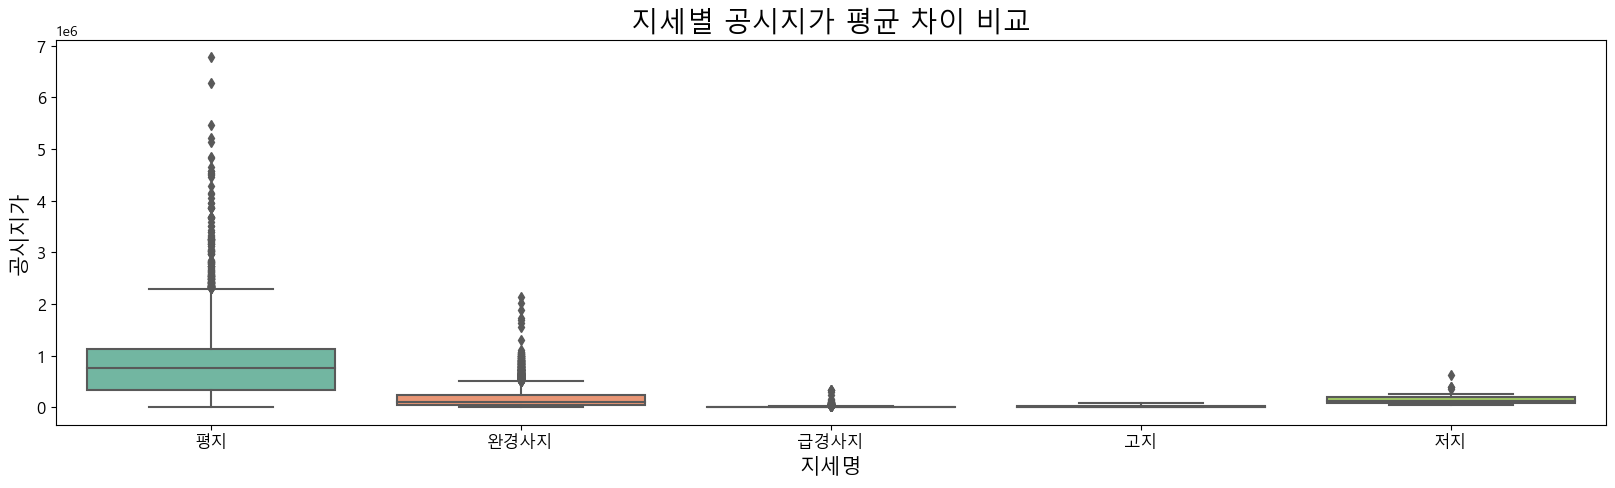

In [39]:
plt.figure(figsize= (20,5))
sns.set_palette('Set2')

plt.title('지세별 공시지가 평균 차이 비교', size= 20)
sns.boxplot(x= '지세명', y= '공시지가', data= df)
plt.xlabel('지세명', fontsize= 15)
plt.ylabel('공시지가', fontsize= 15)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.show()

### 형상별 공시지가 평균 차이 비교

In [40]:
df['형상명'].value_counts()

부정형      2756
사다리형     2365
세로장방형    1545
가로장방형     613
정방형       578
자루형        46
Name: 형상명, dtype: int64

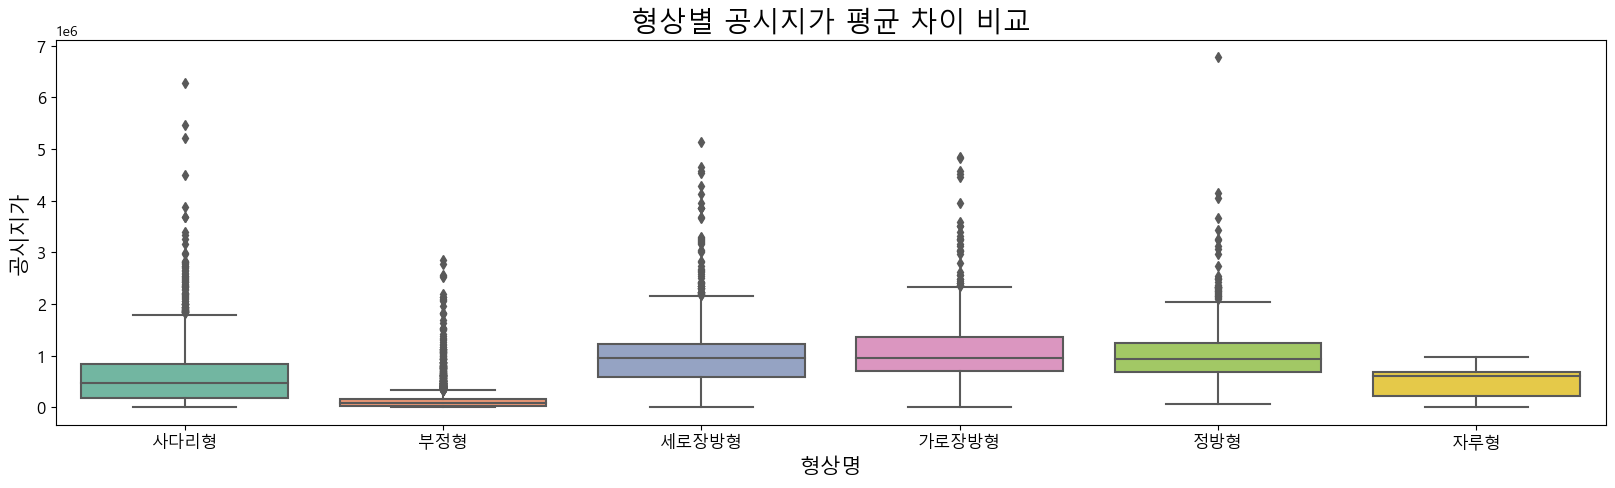

In [41]:
plt.figure(figsize= (20,5))
sns.set_palette('Set2')

plt.title('형상별 공시지가 평균 차이 비교', size= 20)
sns.boxplot(x= '형상명', y= '공시지가', data= df)
plt.xlabel('형상명', fontsize= 15)
plt.ylabel('공시지가', fontsize= 15)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.show()

### 도로교통별 공시지가 평균 차이 비교

In [42]:
df['도로교통'].value_counts()

세로(불)    1818
맹지       1492
소로한면     1385
세로(가)    1370
중로한면      415
소로각지      402
중로각지      279
광대한면      231
광대소각      210
세각(가)     148
세각(불)     114
광대세각       39
Name: 도로교통, dtype: int64

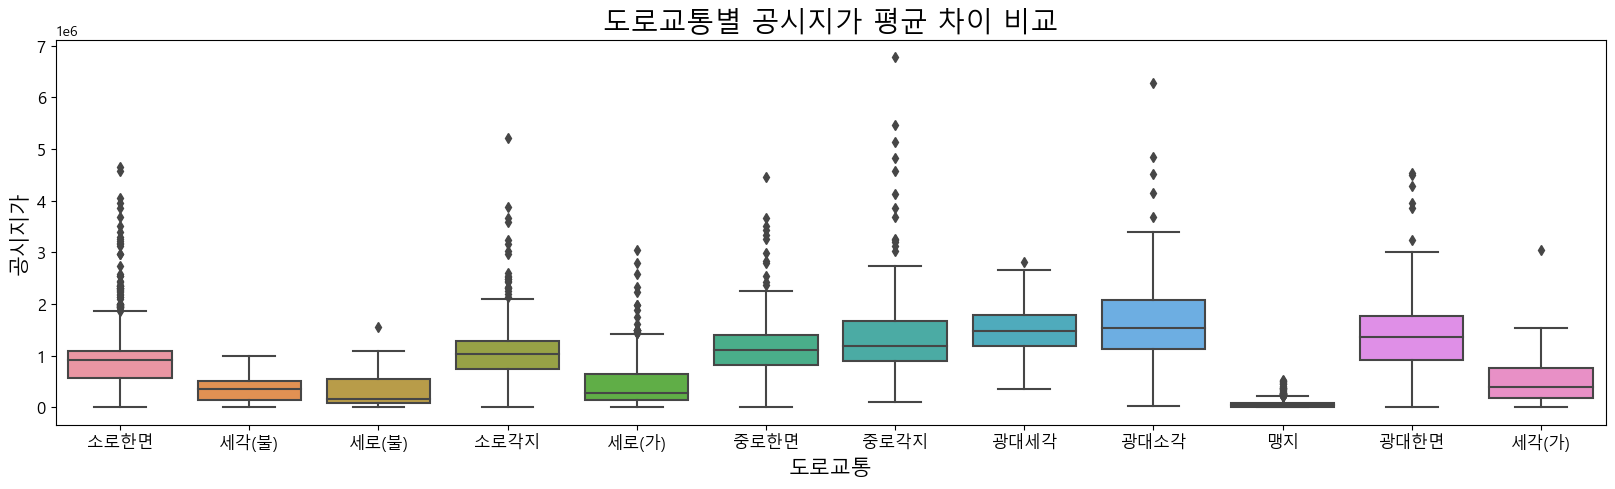

In [43]:
plt.figure(figsize= (20,5))
sns.set_palette('Set2')

plt.title('도로교통별 공시지가 평균 차이 비교', size= 20)
sns.boxplot(x= '도로교통', y= '공시지가', data= df)
plt.xlabel('도로교통', fontsize= 15)
plt.ylabel('공시지가', fontsize= 15)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.show()

### 방위별 공시지가 평균 차이 비교

In [44]:
df['방위'].value_counts()

남서향    603
남동향    582
남향     556
동향     431
북동향    409
서향     365
북서향    329
북향     290
Name: 방위, dtype: int64

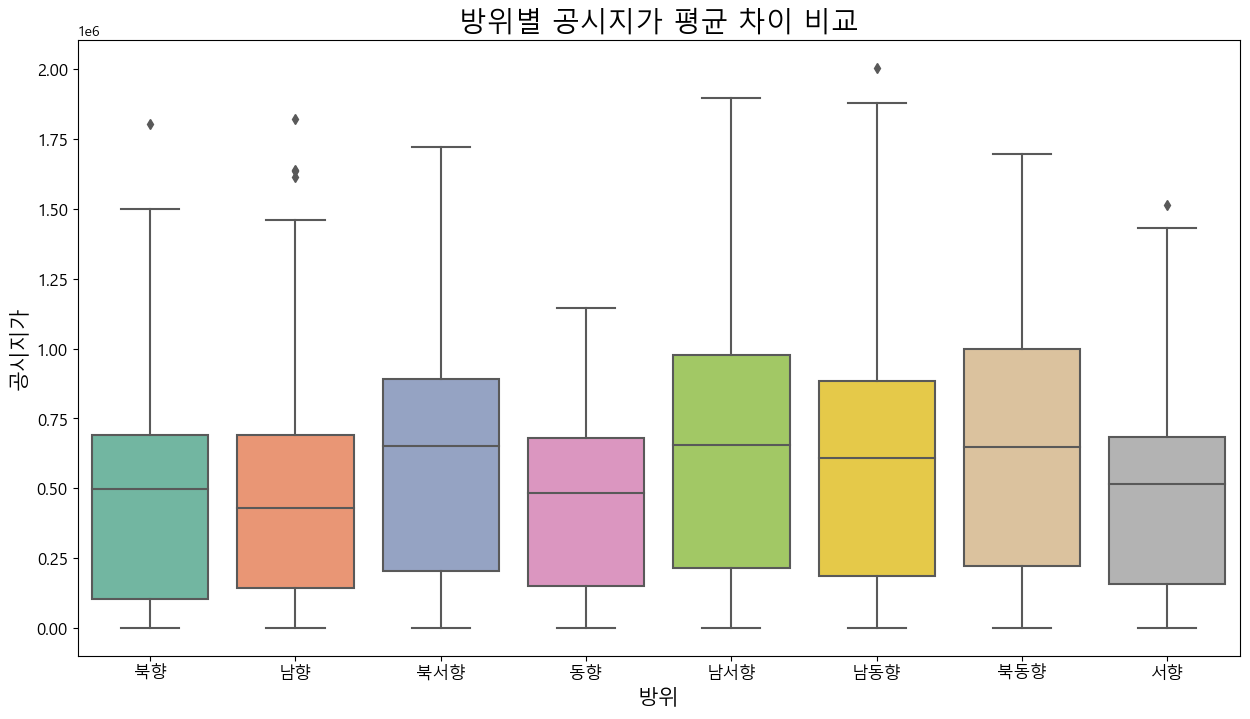

In [45]:
plt.figure(figsize= (15,8))
sns.set_palette('Set2')

plt.title('방위별 공시지가 평균 차이 비교', size= 20)
sns.boxplot(x= '방위', y= '공시지가', data= df)
plt.xlabel('방위', fontsize= 15)
plt.ylabel('공시지가', fontsize= 15)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.show()

## 평균 부동산 순위

### 시군구별 부동산 순위

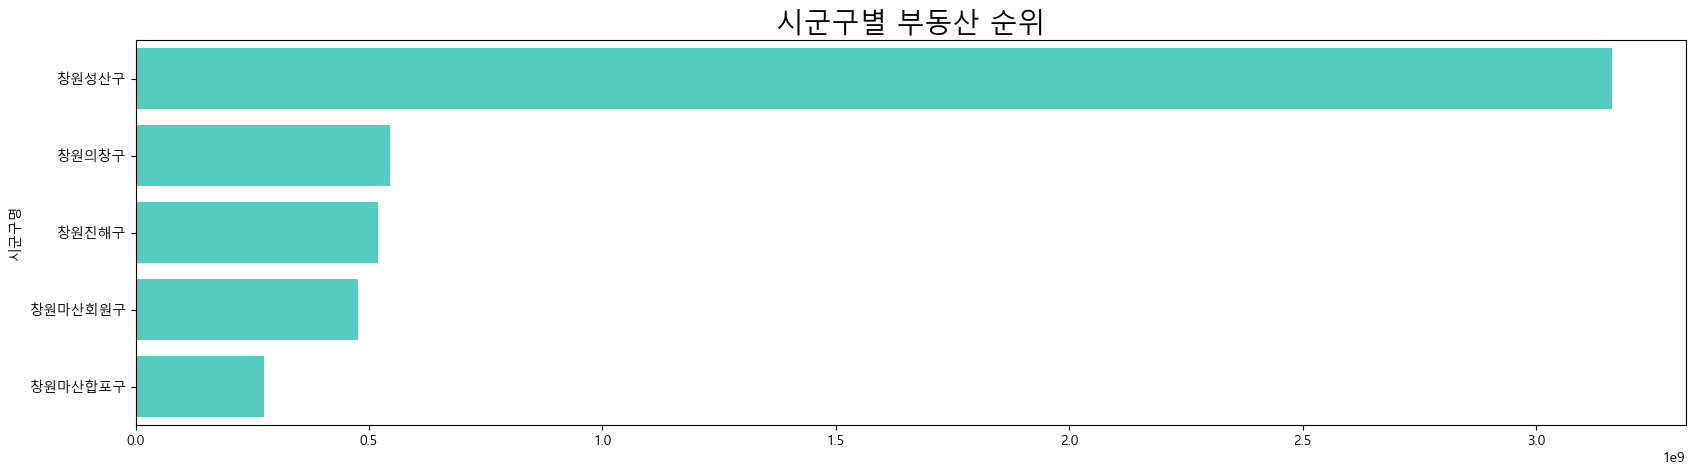

In [46]:
rank1 = df.groupby(['시군구명']).mean()['땅값'].sort_values(ascending= False)

plt.figure(figsize= (20,5))

plt.title('시군구별 부동산 순위', size= 20)
sns.barplot(x= rank1.values, y= rank1.index, color= 'turquoise')

plt.show()

### 소재지별 부동산 상위, 하위 10 곳

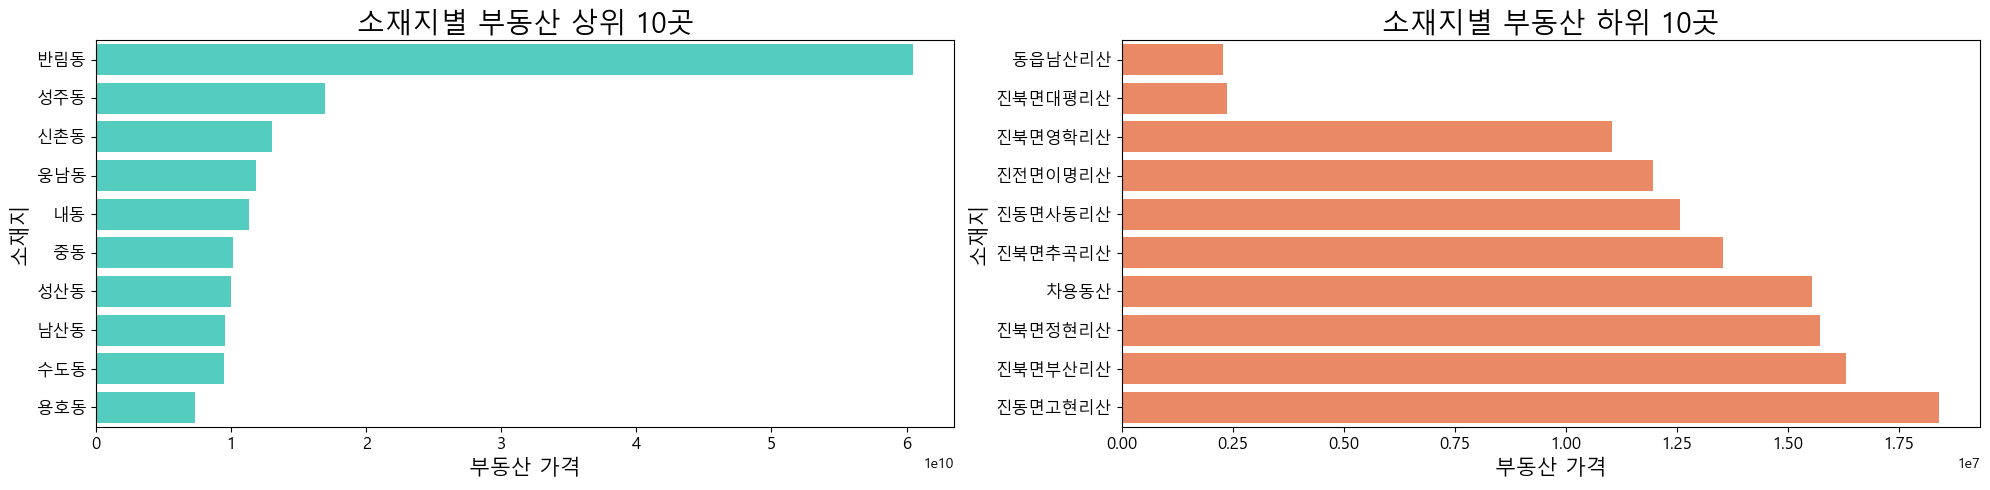

In [47]:
high1 = df.groupby(['소재지']).mean()['땅값'].sort_values(ascending= False).head(10)
low1 = df.groupby(['소재지']).mean()['땅값'].sort_values(ascending= False).tail(10).sort_values()

plt.figure(figsize= (20,5))

plt.subplot(1,2,1)
plt.title('소재지별 부동산 상위 10곳', size= 20)
sns.barplot(x= high1.values, y= high1.index, color= 'turquoise')
plt.xlabel('부동산 가격', fontsize= 15)
plt.xticks(fontsize= 12)
plt.ylabel('소재지', fontsize= 15)
plt.yticks(fontsize= 12)

plt.subplot(1,2,2)
plt.title('소재지별 부동산 하위 10곳', size= 20)
sns.barplot(x= low1.values, y= low1.index, color= 'coral')
plt.xlabel('부동산 가격', fontsize= 15)
plt.xticks(fontsize= 12)
plt.ylabel('소재지', fontsize= 15)
plt.yticks(fontsize= 12)

plt.tight_layout()
plt.show()

### 지목별 부동산 상위, 하위 5곳

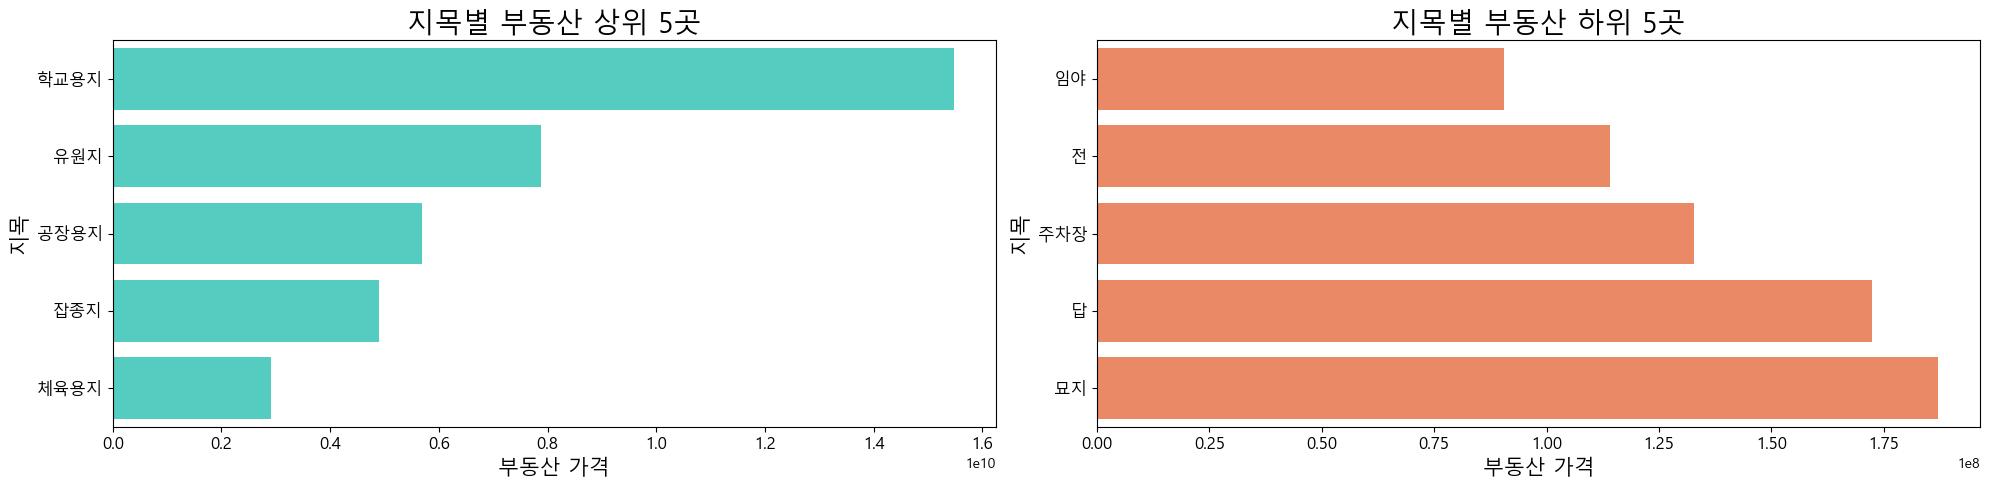

In [56]:
high2 = df.groupby(['지목']).mean()['땅값'].sort_values(ascending= False).head(5)
low2 = df.groupby(['지목']).mean()['땅값'].sort_values(ascending= False).tail(5).sort_values()

plt.figure(figsize= (20,5))

plt.subplot(1,2,1)
plt.title('지목별 부동산 상위 5곳', size= 20)
sns.barplot(x= high2.values, y= high2.index, color= 'turquoise')
plt.xlabel('부동산 가격', fontsize= 15)
plt.xticks(fontsize= 12)
plt.ylabel('지목', fontsize= 15)
plt.yticks(fontsize= 12)

plt.subplot(1,2,2)
plt.title('지목별 부동산 하위 5곳', size= 20)
sns.barplot(x= low2.values, y= low2.index, color= 'coral')
plt.xlabel('부동산 가격', fontsize= 15)
plt.xticks(fontsize= 12)
plt.ylabel('지목', fontsize= 15)
plt.yticks(fontsize= 12)

plt.tight_layout()
plt.show()

### 용도지역1별 부동산 상위, 하위 5곳

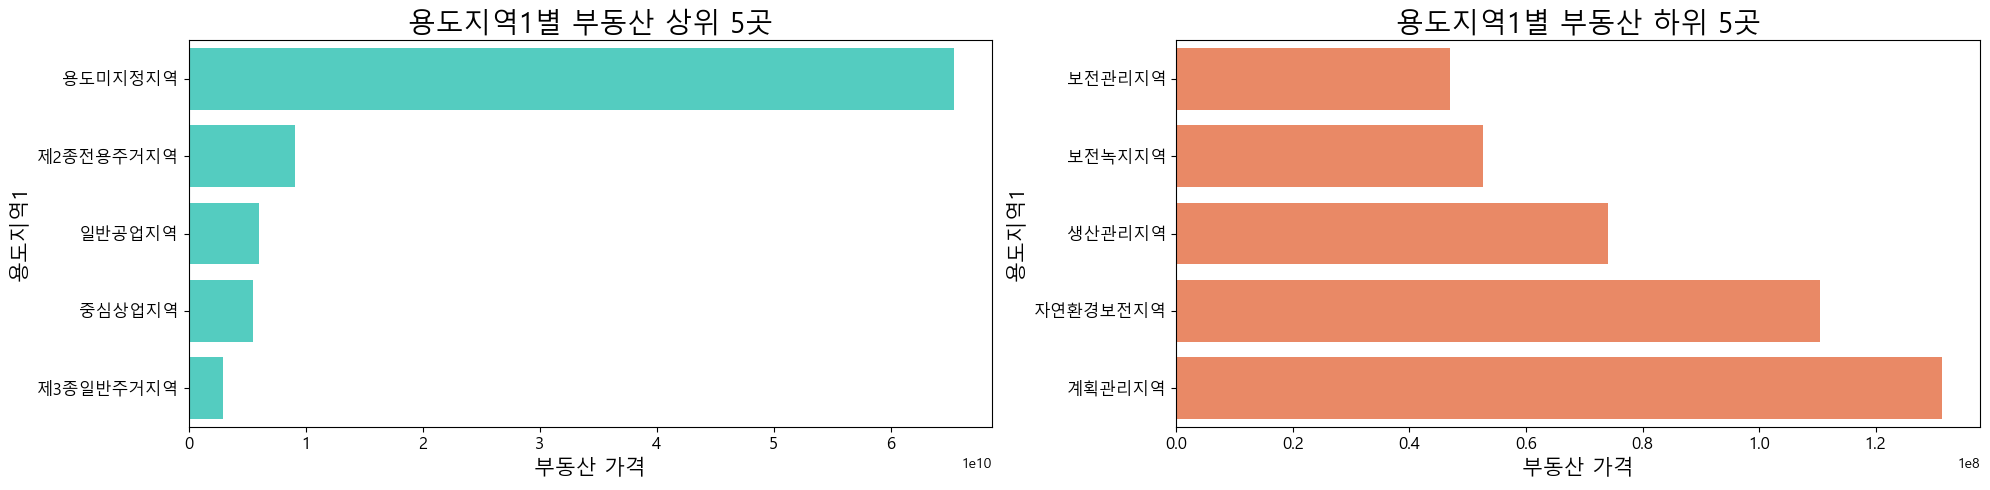

In [57]:
high3 = df.groupby(['용도지역1']).mean()['땅값'].sort_values(ascending= False).head(5)
low3 = df.groupby(['용도지역1']).mean()['땅값'].sort_values(ascending= False).tail(5).sort_values()

plt.figure(figsize= (20,5))

plt.subplot(1,2,1)
plt.title('용도지역1별 부동산 상위 5곳', size= 20)
sns.barplot(x= high3.values, y= high3.index, color= 'turquoise')
plt.xlabel('부동산 가격', fontsize= 15)
plt.xticks(fontsize= 12)
plt.ylabel('용도지역1', fontsize= 15)
plt.yticks(fontsize= 12)

plt.subplot(1,2,2)
plt.title('용도지역1별 부동산 하위 5곳', size= 20)
sns.barplot(x= low3.values, y= low3.index, color= 'coral')
plt.xlabel('부동산 가격', fontsize= 15)
plt.xticks(fontsize= 12)
plt.ylabel('용도지역1', fontsize= 15)
plt.yticks(fontsize= 12)

plt.tight_layout()
plt.show()

## 실거래 부동산 순위

### 시군구별 부동산 순위

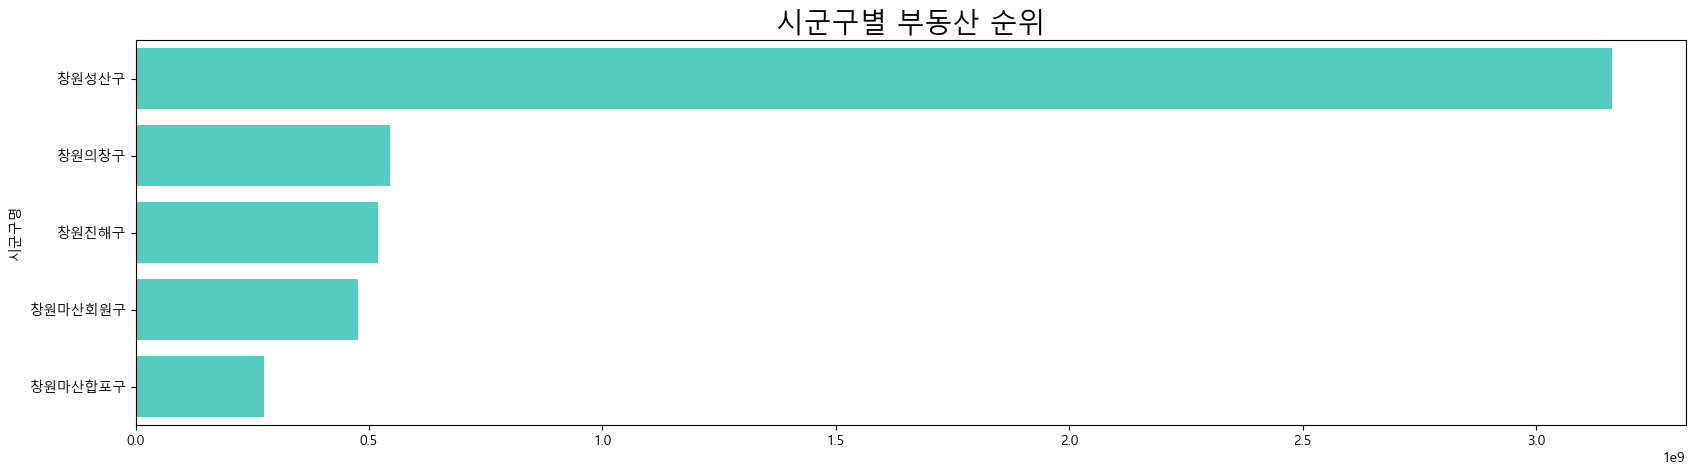

In [50]:
rank2 = df.groupby(['시군구명']).median()['땅값'].sort_values(ascending= False)

plt.figure(figsize= (20,5))

plt.title('시군구별 부동산 순위', size= 20)
sns.barplot(x= rank1.values, y= rank1.index, color= 'turquoise')

plt.show()

### 소재지별 부동산 상위, 하위 10곳

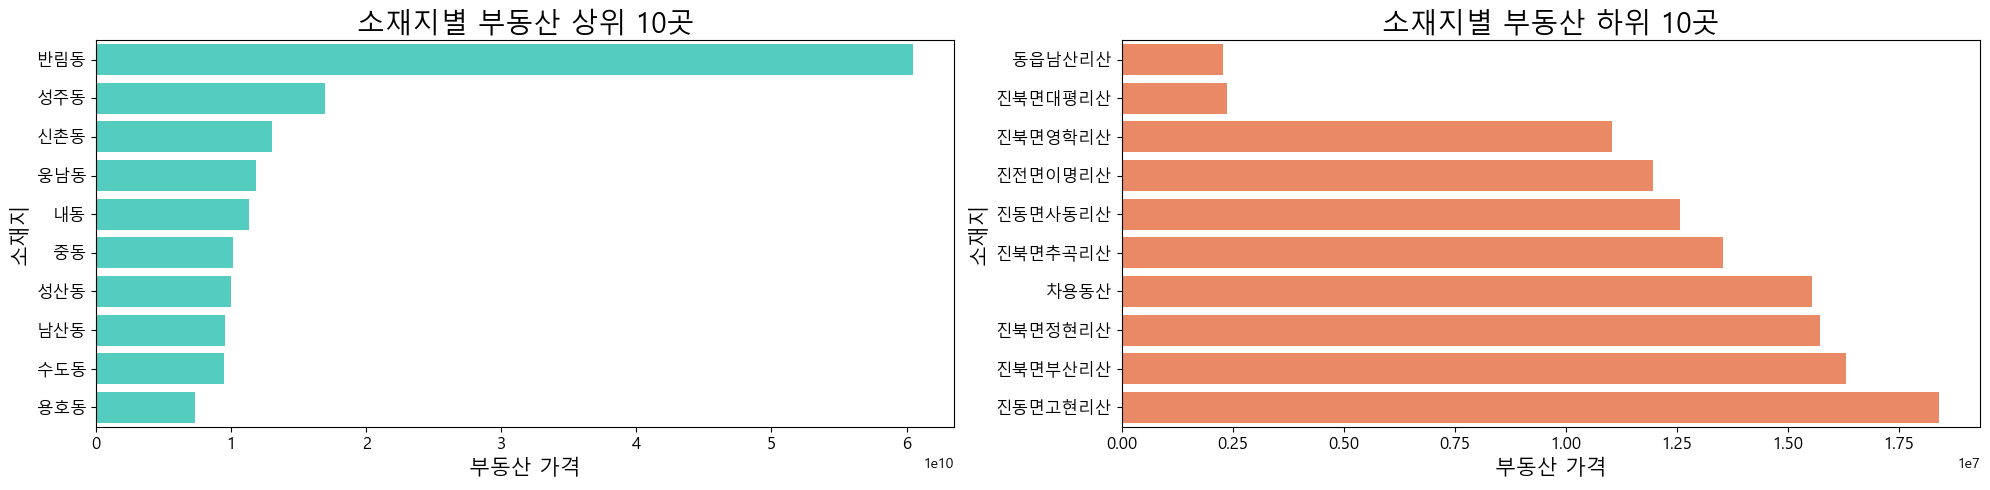

In [51]:
high4 = df.groupby(['소재지']).mean()['땅값'].sort_values(ascending= False).head(10)
low4 = df.groupby(['소재지']).mean()['땅값'].sort_values(ascending= False).tail(10).sort_values()

plt.figure(figsize= (20,5))

plt.subplot(1,2,1)
plt.title('소재지별 부동산 상위 10곳', size= 20)
sns.barplot(x= high4.values, y= high4.index, color= 'turquoise')
plt.xlabel('부동산 가격', fontsize= 15)
plt.xticks(fontsize= 12)
plt.ylabel('소재지', fontsize= 15)
plt.yticks(fontsize= 12)

plt.subplot(1,2,2)
plt.title('소재지별 부동산 하위 10곳', size= 20)
sns.barplot(x= low4.values, y= low4.index, color= 'coral')
plt.xlabel('부동산 가격', fontsize= 15)
plt.xticks(fontsize= 12)
plt.ylabel('소재지', fontsize= 15)
plt.yticks(fontsize= 12)

plt.tight_layout()
plt.show()

## Correlation

### 면적 & 공시지가

#### Scatter Plot

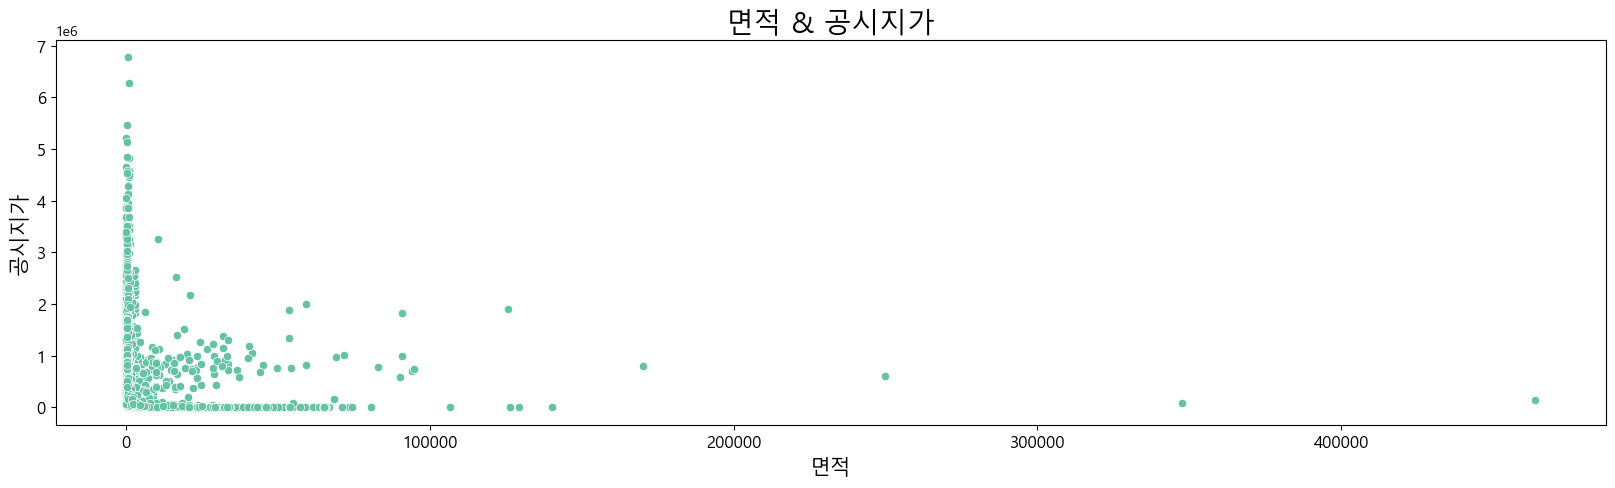

In [52]:
plt.figure(figsize= (20,5))

plt.title('면적 & 공시지가', size= 20)
sns.scatterplot(x= '면적', y= '공시지가', data= df)
plt.xlabel('면적', fontsize= 15)
plt.xticks(fontsize= 12)
plt.ylabel('공시지가', fontsize= 15)
plt.yticks(fontsize= 12)

plt.show()

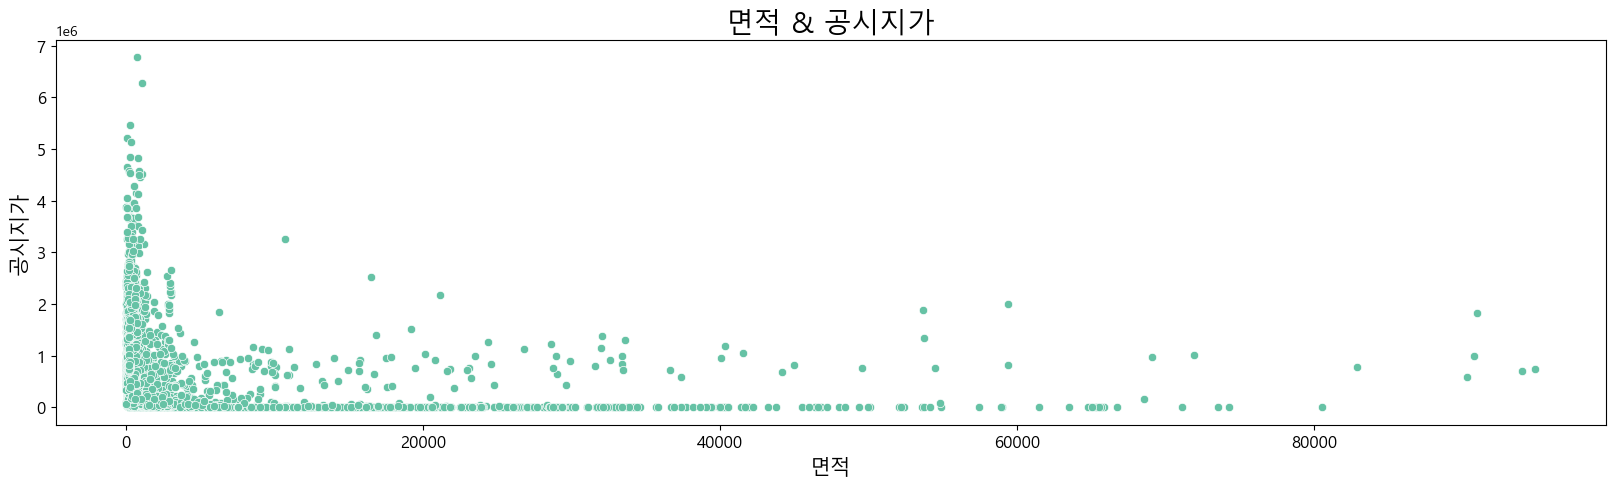

In [53]:
df6 = df[df['면적'] < 100000]

plt.figure(figsize= (20,5))

plt.title('면적 & 공시지가', size= 20)
sns.scatterplot(x= '면적', y= '공시지가', data= df6)
plt.xlabel('면적', fontsize= 15)
plt.xticks(fontsize= 12)
plt.ylabel('공시지가', fontsize= 15)
plt.yticks(fontsize= 12)

plt.show()

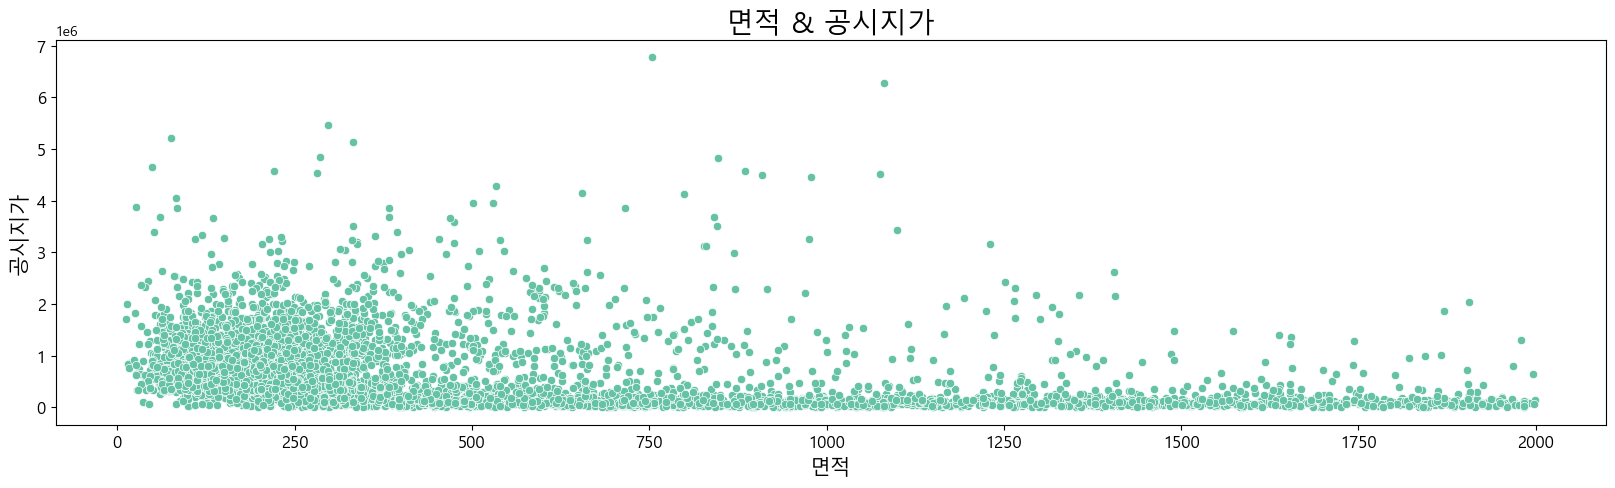

In [54]:
df7 = df[df['면적'] < 2000]

plt.figure(figsize= (20,5))

plt.title('면적 & 공시지가', size= 20)
sns.scatterplot(x= '면적', y= '공시지가', data= df7)
plt.xlabel('면적', fontsize= 15)
plt.xticks(fontsize= 12)
plt.ylabel('공시지가', fontsize= 15)
plt.yticks(fontsize= 12)

plt.show()

### 면적 & 부동산 가격

#### Scatter Plot

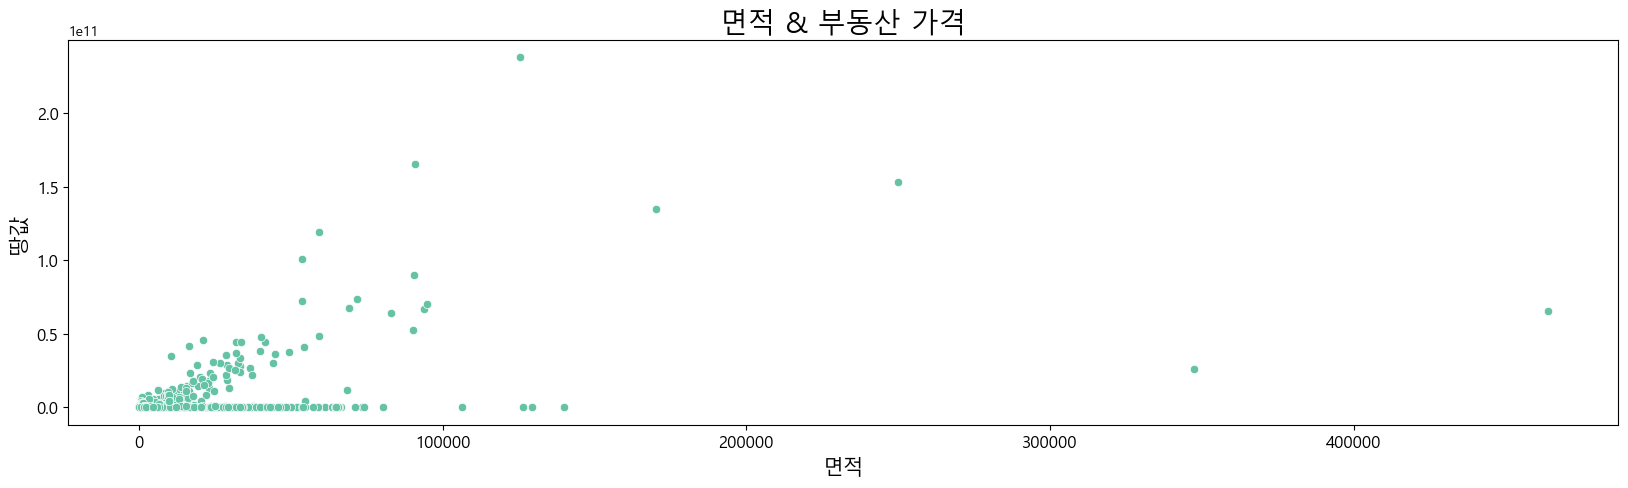

In [55]:
plt.figure(figsize= (20,5))

plt.title('면적 & 부동산 가격', size= 20)
sns.scatterplot(x= '면적', y= '땅값', data= df)
plt.xlabel('면적', fontsize= 15)
plt.xticks(fontsize= 12)
plt.ylabel('땅값', fontsize= 15)
plt.yticks(fontsize= 12)

plt.show()

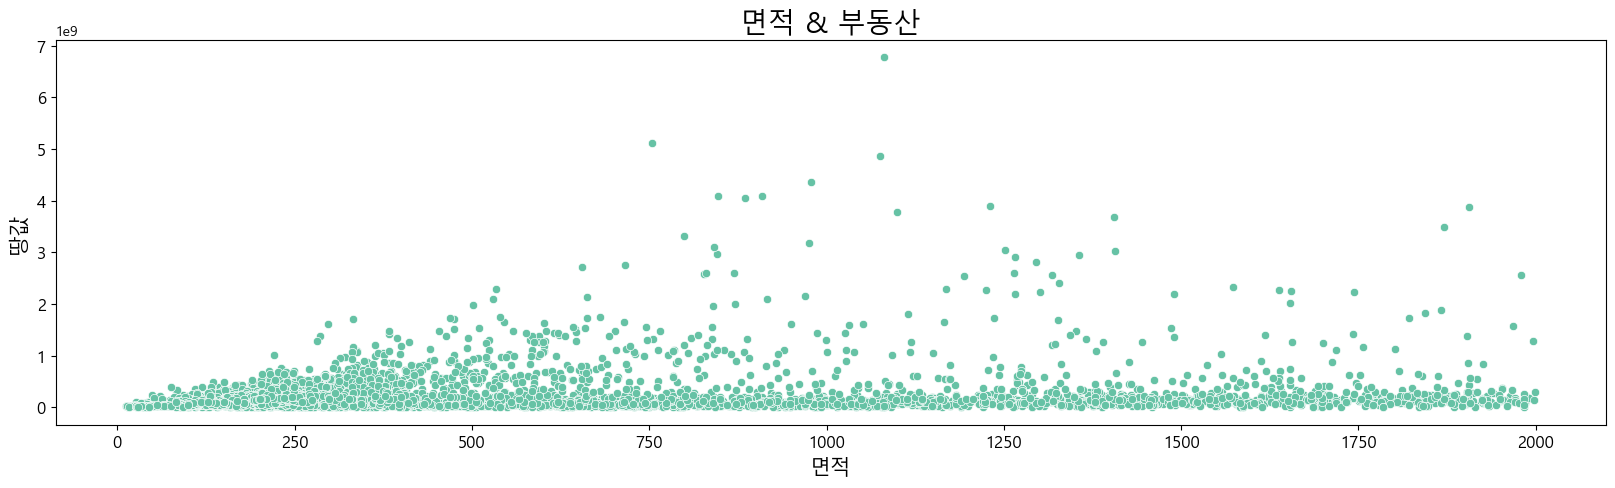

In [59]:
df8 = df[df['면적'] < 2000]

plt.figure(figsize= (20,5))

plt.title('면적 & 부동산', size= 20)
sns.scatterplot(x= '면적', y= '땅값', data= df8)
plt.xlabel('면적', fontsize= 15)
plt.xticks(fontsize= 12)
plt.ylabel('땅값', fontsize= 15)
plt.yticks(fontsize= 12)

plt.show()

## 부동산 가격 비율

### 시군구별 부동산 가격 비율

In [62]:
group1 = df.groupby(['시군구명']).mean()
group1

,면적,공시지가,땅값
시군구명,,,
창원마산합포구,2382.735477,4.826307e+05,2.758573e+08
창원마산회원구,2388.458981,7.084034e+05,4.760800e+08
창원성산구,5444.713978,1.070303e+06,3.162435e+09
창원의창구,2488.033567,4.697798e+05,5.459261e+08
창원진해구,2163.194812,5.759137e+05,5.189213e+08


In [73]:
group1.index

Index(['창원마산합포구', '창원마산회원구', '창원성산구', '창원의창구', '창원진해구'], dtype='object', name='시군구명')

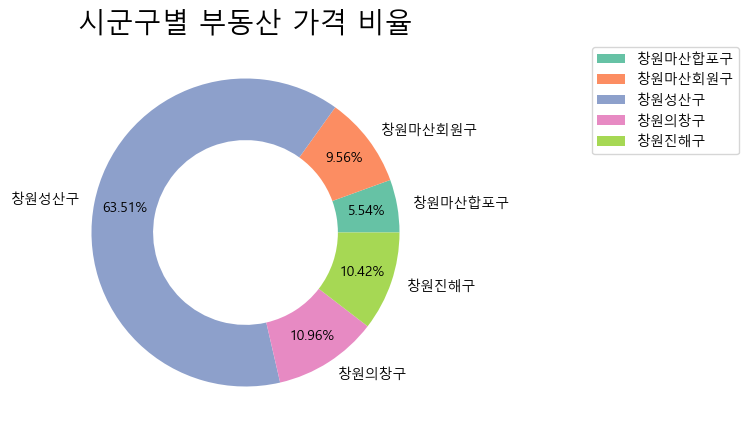

In [105]:
plt.figure(figsize= (15,5))

sns.set_palette('Set2')
plt.pie(group1['땅값'],
        labels= group1.index,
        autopct= '%.2f%%',
        pctdistance= 0.8,
        textprops= {'fontsize':10},
        wedgeprops=dict(width=0.4))
plt.title('시군구별 부동산 가격 비율', fontsize= 20)



plt.legend(bbox_to_anchor=(1.8, 1.0), loc='upper right')
plt.show()